# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


*In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 

*To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), 

*the [OpenWeatherMap API](https://openweathermap.org/api), 

*and a little common sense to create a representative model of weather across world cities.


In [202]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [203]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


580

In [204]:
cities_df = pd.DataFrame(cities, columns = ['city'])
cities_df

city
0          vaini
1    new norfolk
2         dikson
3     chokurdakh
4       katsuura
..           ...
575      le port
576       yaring
577      manyana
578        gimli
579    massakory

[580 rows x 1 columns]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [205]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

weather_query_url = f"{base_url}&APPID={weather_api_key}"


print(weather_query_url)

http://api.openweathermap.org/data/2.5/weather?&APPID=8946465e1a8d147457256e3299779a5b


In [206]:
# Get weather data
# use iterrows to iterate through pandas dataframe
temperature = []
index = []

cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []


Error_count = 0
for index, row in cities_df.iterrows():

    # get city name from df
    city_name = row['city']
    
    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_name}.")
    #final_weather_query_url = weather_query_url + "&q="+ city_name +"&units="+units
    #print(final_weather_query_url)
    weather_json = requests.get(weather_query_url + "&q="+ city_name +"&units="+units).json()
    #pprint(weather_json)
    
    ##extract results
    try:
        #Cloudiness
        cloudiness = weather_json["clouds"]["all"]
        cities_df.loc[index, 'cloudiness'] = cloudiness
        #Country
        country = weather_json["sys"]["country"]
        cities_df.loc[index, 'country'] = country
        #date
        date = weather_json["dt"]
        cities_df.loc[index, 'date'] = date
        #humidity
        humidity = weather_json["main"]["humidity"]
        cities_df.loc[index, 'humidity'] = humidity
        #latitude
        latitude = weather_json["coord"]["lat"]
        cities_df.loc[index, 'latitude'] = latitude
        #longitude
        longitude = weather_json["coord"]["lon"]
        cities_df.loc[index, 'longitude'] = longitude
        #Max Temp
        max_temp = weather_json["main"]["temp_max"]
        cities_df.loc[index, 'max_temp'] = max_temp
        #wind_speed
        wind_speed = weather_json["wind"]["speed"]
        cities_df.loc[index, 'wind_speed'] = wind_speed
        
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        Error_count = Error_count +1 
    print("------------")

Retrieving Results for Index 0: vaini.
------------
Retrieving Results for Index 1: new norfolk.
------------
Retrieving Results for Index 2: dikson.
------------
Retrieving Results for Index 3: chokurdakh.
------------
Retrieving Results for Index 4: katsuura.
------------
Retrieving Results for Index 5: yellowknife.
------------
Retrieving Results for Index 6: kruisfontein.
------------
Retrieving Results for Index 7: luderitz.
------------
Retrieving Results for Index 8: nikolskoye.
------------
Retrieving Results for Index 9: baherden.
------------
Retrieving Results for Index 10: taoudenni.
------------
Retrieving Results for Index 11: lebowakgomo.
------------
Retrieving Results for Index 12: khani.
------------
Retrieving Results for Index 13: college.
------------
Retrieving Results for Index 14: thompson.
------------
Retrieving Results for Index 15: cayenne.
------------
Retrieving Results for Index 16: shenxian.
------------
Retrieving Results for Index 17: klaksvik.
-------

------------
Retrieving Results for Index 140: carballo.
------------
Retrieving Results for Index 141: palabuhanratu.
Missing field/result... skipping.
------------
Retrieving Results for Index 142: mount gambier.
------------
Retrieving Results for Index 143: batouri.
------------
Retrieving Results for Index 144: miramar.
------------
Retrieving Results for Index 145: henties bay.
------------
Retrieving Results for Index 146: jalu.
------------
Retrieving Results for Index 147: lebu.
------------
Retrieving Results for Index 148: karratha.
------------
Retrieving Results for Index 149: lyngseidet.
------------
Retrieving Results for Index 150: kegayli.
Missing field/result... skipping.
------------
Retrieving Results for Index 151: duayaw nkwanta.
------------
Retrieving Results for Index 152: vanavara.
------------
Retrieving Results for Index 153: san cristobal.
------------
Retrieving Results for Index 154: sao gabriel.
------------
Retrieving Results for Index 155: khonuu.
Miss

------------
Retrieving Results for Index 275: mahoba.
------------
Retrieving Results for Index 276: monte siao.
------------
Retrieving Results for Index 277: tabou.
------------
Retrieving Results for Index 278: pacific grove.
------------
Retrieving Results for Index 279: coquimbo.
------------
Retrieving Results for Index 280: dodge city.
------------
Retrieving Results for Index 281: stoyba.
Missing field/result... skipping.
------------
Retrieving Results for Index 282: bonavista.
------------
Retrieving Results for Index 283: talnakh.
------------
Retrieving Results for Index 284: burica.
Missing field/result... skipping.
------------
Retrieving Results for Index 285: villamartin.
------------
Retrieving Results for Index 286: sucua.
------------
Retrieving Results for Index 287: biltine.
------------
Retrieving Results for Index 288: nemuro.
------------
Retrieving Results for Index 289: el buen pastor.
Missing field/result... skipping.
------------
Retrieving Results for Inde

------------
Retrieving Results for Index 410: tabulbah.
Missing field/result... skipping.
------------
Retrieving Results for Index 411: buchanan.
------------
Retrieving Results for Index 412: troitsko-pechorsk.
------------
Retrieving Results for Index 413: praia.
------------
Retrieving Results for Index 414: samfya.
------------
Retrieving Results for Index 415: fengcheng.
------------
Retrieving Results for Index 416: carnot.
------------
Retrieving Results for Index 417: isangel.
------------
Retrieving Results for Index 418: alofi.
------------
Retrieving Results for Index 419: nizhnyaya tavda.
------------
Retrieving Results for Index 420: mago.
------------
Retrieving Results for Index 421: hay river.
------------
Retrieving Results for Index 422: kamiiso.
------------
Retrieving Results for Index 423: ossora.
------------
Retrieving Results for Index 424: broken hill.
------------
Retrieving Results for Index 425: bendigo.
------------
Retrieving Results for Index 426: tigil

------------
Retrieving Results for Index 548: san luis.
------------
Retrieving Results for Index 549: middle island.
------------
Retrieving Results for Index 550: lingao.
------------
Retrieving Results for Index 551: chulman.
------------
Retrieving Results for Index 552: morant bay.
------------
Retrieving Results for Index 553: saryg-sep.
------------
Retrieving Results for Index 554: altamont.
------------
Retrieving Results for Index 555: maniitsoq.
------------
Retrieving Results for Index 556: marcona.
Missing field/result... skipping.
------------
Retrieving Results for Index 557: wad rawah.
------------
Retrieving Results for Index 558: mae sot.
------------
Retrieving Results for Index 559: avera.
------------
Retrieving Results for Index 560: porto novo.
------------
Retrieving Results for Index 561: padang.
------------
Retrieving Results for Index 562: taltal.
------------
Retrieving Results for Index 563: lakatoro.
------------
Retrieving Results for Index 564: salinop

In [208]:
print(Error_count)

cities_df.index.names = ["city_ID"]

#cities_df

53


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [209]:
cities_df.to_csv('/Users/jenniferramsey/hw/Python_API/output_data/cities.csv', index=True) 

In [210]:
cities_df.head()

#cities_df['wind_speed'].min(), cities_df['wind_speed'].max()

(0.45, 33.26)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

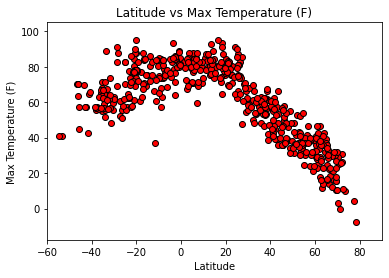

In [215]:
x_axis = cities_df['latitude']
y_axis = cities_df['max_temp']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['max_temp'].min() - 10), (cities_df['max_temp'].max() + 10))
plt.title('Latitude vs Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

##Measuring the relationship between Latitude (Distance from the equator) and the Max Temp for the region.
##The closer the city is to the equator (lat = 0), the higher the temperature.

#### Latitude vs. Humidity Plot

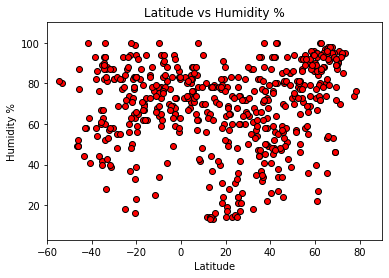

In [217]:
x_axis = cities_df['latitude']
y_axis = cities_df['humidity']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['humidity'].min() - 10), (cities_df['humidity'].max() + 10))
plt.title('Latitude vs Humidity %')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

##measuring the relationship between Latitude and Humidity.
##there does not appear to be any strong relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

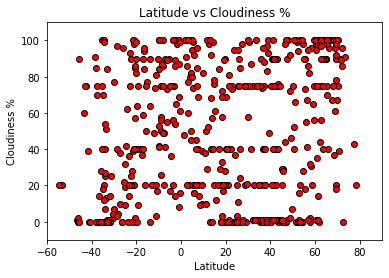

In [218]:
x_axis = cities_df['latitude']
y_axis = cities_df['cloudiness']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['cloudiness'].min() - 10), (cities_df['cloudiness'].max() + 10))
plt.title('Latitude vs Cloudiness %')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

#measuring the relationship between latitude and cloudiness.
##there does not appear to be a strong relationship between latitude and cloudiness

#### Latitude vs. Wind Speed Plot

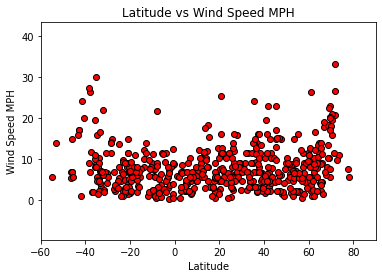

In [219]:
x_axis = cities_df['latitude']
y_axis = cities_df['wind_speed']

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-60, 90)
plt.ylim((cities_df['wind_speed'].min() - 10), (cities_df['wind_speed'].max() + 10))
plt.title('Latitude vs Wind Speed MPH')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')
plt.show()

#measuring the relationship between latitude and wind speed.
##there does not appear to be a significant relationship between latitude and wind speed,
#but the data may support stronger winds closer to the poles

## Linear Regression

In [158]:
# OPTIONAL: Create a function to create Linear Regression plots


In [168]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = cities_df[cities_df.latitude >= 0]
#northern_hemisphere

southern_hemisphere = cities_df[cities_df.latitude < 0]
#southern_hemisphere

#southern_hemisphere['latitude'].max(), northern_hemisphere['latitude'].min()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

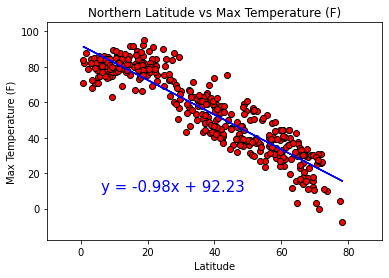

In [220]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['max_temp'].min() - 10), (northern_hemisphere['max_temp'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title('Northern Latitude vs Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

##measuring the relationship between latitude and temperature in the NORTHERN hemisphere.
##There is a relationship of decrease of temperature as latitude increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

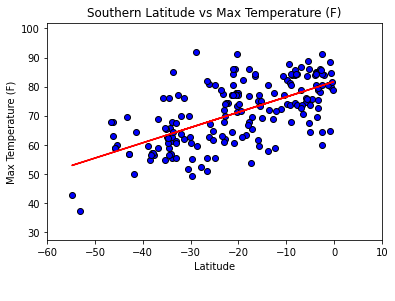

In [221]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['max_temp'].min() - 10), (southern_hemisphere['max_temp'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('Southern Latitude vs Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

##measuring the relationship between latitude and temperature in the SOUTHERN hemisphere.
##There is a relationship of decrease of temperature as latitude decreases,
##though not as sharply as in the north.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

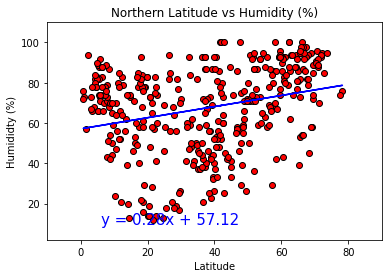

In [222]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['humidity'].min() - 10), (northern_hemisphere['humidity'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title('Northern Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humididty (%)')
plt.show()
##measuring the relationship between Latitude and Humidity in the NORTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, Humdity rises slightly.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

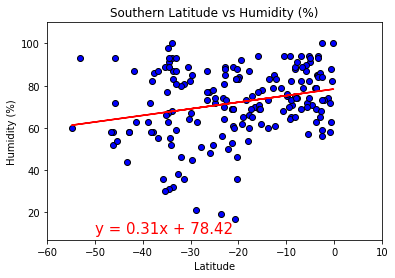

In [223]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['humidity'].min() - 10), (southern_hemisphere['humidity'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('Southern Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

##measuring the relationship between Latitude and Humidity in the SOUTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, Humdity rises slightly.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

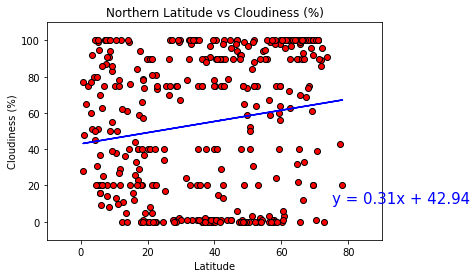

In [224]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['cloudiness'].min() - 10), (northern_hemisphere['cloudiness'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(75,10),fontsize=15,color="blue")
plt.title('Northern Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

##measuring the relationship between Latitude and Cloudiness in the NORTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, cloudiness rises slightly.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

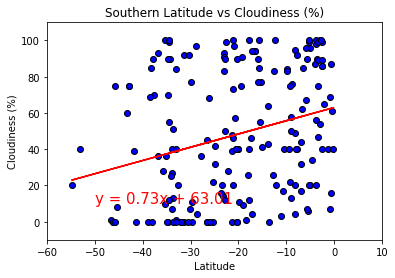

In [225]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['cloudiness'].min() - 10), (southern_hemisphere['cloudiness'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('Southern Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

##measuring the relationship between Latitude and Cloudiness in the SOUTHERN hemisphere.
##regression indicates that there is some evidence that as latitude rises, cloudiness rises slightly.



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

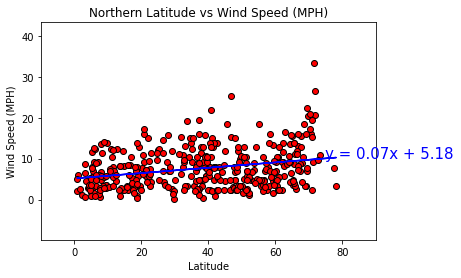

In [226]:
x_axis = northern_hemisphere['latitude']
y_axis = northern_hemisphere['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=1.0)
plt.xlim(-10, 90)
plt.ylim((northern_hemisphere['wind_speed'].min() - 10), (northern_hemisphere['wind_speed'].max() + 10))
plt.plot(x_axis,regress_values,"b-")
plt.annotate(line_eq,(75,10),fontsize=15,color="blue")
plt.title('Northern Latitude vs Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

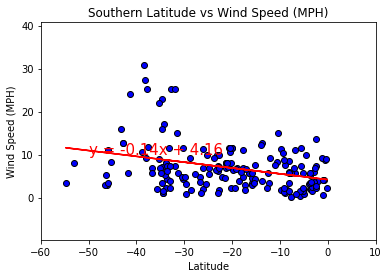

In [227]:
x_axis = southern_hemisphere['latitude']
y_axis = southern_hemisphere['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black", alpha=1.0)
plt.xlim(-60, 10)
plt.ylim((southern_hemisphere['wind_speed'].min() - 10), (southern_hemisphere['wind_speed'].max() + 10))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title('Southern Latitude vs Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()